In [1]:
import pickle
import pandas as pd
file_path = 'adj_matrix_no_rules.pkl'
# file_path = 'adj_matrix.pkl'

with open(file_path, 'rb') as file:
    G = pickle.load(file)

In [2]:
file_path = "papers_missing_all_refs.pkl"
# file_path = 'adj_matrix.pkl'

with open(file_path, 'rb') as file:
    paper_missing_all_refs = pickle.load(file)

### Convert data

In [2]:
import networkx as nx
import torch
from torch_geometric.data import Data
import numpy as np
import pickle
import pandas as pd

c:\Users\mjiaj\anaconda3\lib\site-packages\torch_geometric\typing.py:31: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: [WinError 127] 找不到指定的程序。
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "


In [3]:
title_embedding_scibert_df = pd.read_csv('title_embeddings.csv',index_col=0)
title_embedding_scibert_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
58437767ac44360f1083dc4b,-0.824786,-0.496071,-0.918687,0.705423,0.735410,-0.328620,0.627544,0.294441,-0.695079,-0.999970,...,0.582804,-0.515950,0.948108,0.657265,-0.695355,-0.000235,0.677333,-0.929345,-0.746027,0.725052
53e9af6eb7602d97039b072d,0.161026,0.149452,-0.538504,-0.436387,-0.325272,0.155006,-0.668883,0.096176,-0.208286,-0.940925,...,0.675212,0.280501,0.137779,-0.034681,-0.450761,0.166967,0.711718,-0.688559,0.082910,-0.294280
558ac0e4e4b0b32fcb38a987,-0.880106,-0.357608,-0.700652,0.778670,0.612230,-0.220756,0.753683,0.196999,-0.453923,-0.999975,...,0.446530,-0.005649,0.893615,0.774759,-0.612863,0.364369,0.506116,-0.803220,-0.588063,0.800300
53e9abfeb7602d97035c1b5a,-0.902962,-0.396300,-0.405810,0.738705,0.342433,-0.263979,0.821776,0.123780,-0.159408,-0.999971,...,0.386560,0.330092,0.836750,0.853161,-0.301388,0.443514,0.537229,-0.498462,-0.669053,0.880758
558a52cce4b031bae1f6f39f,-0.916149,-0.596219,-0.957395,0.826105,0.857415,-0.342739,0.730999,0.352518,-0.909546,-0.999993,...,0.450169,-0.677797,0.997195,0.755982,-0.942335,-0.188587,0.508795,-0.968928,-0.682909,0.826246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5b3d98c717c44a510f801514,-0.836750,-0.492779,-0.979932,0.781437,0.863501,-0.324894,0.573184,0.295217,-0.917073,-0.999988,...,0.553916,-0.676702,0.993963,0.554144,-0.830500,-0.377605,0.662548,-0.979359,-0.691253,0.643177
5cf48a47da56291d582ab19d,-0.870062,-0.400305,-0.882957,0.705301,0.681507,-0.285990,0.553429,0.290797,-0.655919,-0.999963,...,0.479473,-0.250324,0.942343,0.700314,-0.706295,0.089316,0.603830,-0.906914,-0.635680,0.720214
5e5e186d93d709897ce02914,-0.922635,-0.531377,-0.977814,0.781571,0.859279,-0.305463,0.785561,0.259992,-0.919350,-0.999995,...,0.542410,-0.711560,0.995664,0.705420,-0.910707,-0.357789,0.590347,-0.962992,-0.661176,0.797933
55323e3e45cec66b6f9e269b,-0.905866,-0.407517,-0.634442,0.802840,0.533481,-0.314787,0.836522,0.128692,-0.514390,-0.999989,...,0.495823,0.097511,0.925015,0.848216,-0.623049,0.349699,0.598257,-0.743289,-0.678885,0.852942


In [7]:
# abs_embedding_scibert_df = pd.read_csv('abstract_embeddings_scibert.csv',index_col=0)
abs_embedding_scibert_df = pd.read_csv('abs_embedding_exp.csv',index_col=0)
abs_embedding_scibert_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
58437767ac44360f1083dc4b,-0.152303,-0.390096,-0.986757,-0.120460,0.873302,-0.024935,-0.799213,0.153384,-0.929487,-0.997644,...,0.778541,-0.748302,0.985352,-0.226012,-0.953605,-0.522454,0.771232,-0.986166,-0.244210,-0.408567
53e9af6eb7602d97039b072d,-0.416044,-0.462161,-0.994409,0.345268,0.935479,0.021771,-0.529124,0.163951,-0.978082,-0.999902,...,0.901324,-0.813771,0.996725,0.018261,-0.947817,-0.675669,0.901164,-0.995953,-0.311024,0.082388
558ac0e4e4b0b32fcb38a987,-0.371007,-0.308179,-0.938366,-0.047581,0.803794,-0.036581,-0.532876,0.009030,-0.807975,-0.999088,...,0.729485,-0.453495,0.964181,0.125479,-0.876349,-0.253309,0.734869,-0.975436,-0.277078,0.180688
53e9abfeb7602d97035c1b5a,-0.713202,-0.423391,-0.985424,0.469833,0.890071,-0.141894,0.020576,0.152386,-0.873248,-0.999898,...,0.604136,-0.234757,0.992878,0.282128,-0.910944,-0.234513,0.694344,-0.984952,-0.282739,0.241017
558a52cce4b031bae1f6f39f,-0.696590,-0.501791,-0.985014,0.428033,0.875412,-0.192552,0.094696,0.293755,-0.955410,-0.999989,...,0.823424,-0.640182,0.994293,0.424698,-0.891000,-0.423704,0.843080,-0.989141,-0.504251,0.416959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5b3d98c717c44a510f801514,-0.298635,-0.145125,-0.951166,-0.038564,0.797177,-0.004458,-0.745038,-0.067583,-0.825545,-0.999184,...,0.586310,-0.410200,0.963137,-0.215081,-0.698537,-0.117380,0.622148,-0.978628,-0.155375,-0.093838
5cf48a47da56291d582ab19d,-0.703055,-0.335629,-0.911536,0.502831,0.835007,-0.379065,0.071152,0.110880,-0.734486,-0.999895,...,0.468277,-0.060109,0.958818,0.464954,-0.671177,-0.040088,0.578229,-0.954301,-0.583582,0.535142
5e5e186d93d709897ce02914,-0.823150,-0.415492,-0.899726,0.541976,0.743623,-0.141887,0.409058,0.149398,-0.637301,-0.999931,...,0.524801,-0.185618,0.963725,0.704968,-0.921942,0.064732,0.542826,-0.958541,-0.473198,0.709188
55323e3e45cec66b6f9e269b,-0.648758,-0.484981,-0.990189,0.326636,0.935962,-0.186310,-0.415332,0.297765,-0.955722,-0.999965,...,0.759706,-0.828807,0.996959,0.094005,-0.953172,-0.335595,0.808127,-0.989411,-0.457531,0.114983


In [51]:
title_embedding_df = pd.read_csv('title_embeddings.csv',index_col=0)
title_embedding_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
58437767ac44360f1083dc4b,-0.824786,-0.496071,-0.918687,0.705423,0.735410,-0.328620,0.627544,0.294441,-0.695079,-0.999970,...,0.582804,-0.515950,0.948108,0.657265,-0.695355,-0.000235,0.677333,-0.929345,-0.746027,0.725052
53e9af6eb7602d97039b072d,0.161026,0.149452,-0.538504,-0.436387,-0.325272,0.155006,-0.668883,0.096176,-0.208286,-0.940925,...,0.675212,0.280501,0.137779,-0.034681,-0.450761,0.166967,0.711718,-0.688559,0.082910,-0.294280
558ac0e4e4b0b32fcb38a987,-0.880106,-0.357608,-0.700652,0.778670,0.612230,-0.220756,0.753683,0.196999,-0.453923,-0.999975,...,0.446530,-0.005649,0.893615,0.774759,-0.612863,0.364369,0.506116,-0.803220,-0.588063,0.800300
53e9abfeb7602d97035c1b5a,-0.902962,-0.396300,-0.405810,0.738705,0.342433,-0.263979,0.821776,0.123780,-0.159408,-0.999971,...,0.386560,0.330092,0.836750,0.853161,-0.301388,0.443514,0.537229,-0.498462,-0.669053,0.880758
558a52cce4b031bae1f6f39f,-0.916149,-0.596219,-0.957395,0.826105,0.857415,-0.342739,0.730999,0.352518,-0.909546,-0.999993,...,0.450169,-0.677797,0.997195,0.755982,-0.942335,-0.188587,0.508795,-0.968928,-0.682909,0.826246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5b3d98c717c44a510f801514,-0.836750,-0.492779,-0.979932,0.781437,0.863501,-0.324894,0.573184,0.295217,-0.917073,-0.999988,...,0.553916,-0.676702,0.993963,0.554144,-0.830500,-0.377605,0.662548,-0.979359,-0.691253,0.643177
5cf48a47da56291d582ab19d,-0.870062,-0.400305,-0.882957,0.705301,0.681507,-0.285990,0.553429,0.290797,-0.655919,-0.999963,...,0.479473,-0.250324,0.942343,0.700314,-0.706295,0.089316,0.603830,-0.906914,-0.635680,0.720214
5e5e186d93d709897ce02914,-0.922635,-0.531377,-0.977814,0.781571,0.859279,-0.305463,0.785561,0.259992,-0.919350,-0.999995,...,0.542410,-0.711560,0.995664,0.705420,-0.910707,-0.357789,0.590347,-0.962992,-0.661176,0.797933
55323e3e45cec66b6f9e269b,-0.905866,-0.407517,-0.634442,0.802840,0.533481,-0.314787,0.836522,0.128692,-0.514390,-0.999989,...,0.495823,0.097511,0.925015,0.848216,-0.623049,0.349699,0.598257,-0.743289,-0.678885,0.852942


In [4]:
abs_embedding_df = pd.read_csv('abstract_embeddings.csv',index_col=0)
# abs_embedding_df

In [6]:
for node in G.nodes():
    if node in abs_embedding_df.index and node in abs_embedding_df.index:
        G.nodes[node]['title_embeddings'] = torch.tensor(abs_embedding_df.loc[node].values)
        G.nodes[node]['abstract_embeddings'] = torch.tensor(abs_embedding_df.loc[node].values)

In [7]:
node_name_idx_dict = {}
idx = 0
for node in G.nodes(data=True):
    node_name_idx_dict[node[0]] = idx
    idx+=1
node_name_idx_dict

{'61dbf1dcd18a2b6e00d9f311': 0,
 '61dbf06b6750f87b50ecd224': 1,
 '6042187291e0115d09aff2a7': 2,
 '60c31feb6750f85387887e7c': 3,
 '5ff8844791e011c832676679': 4,
 '60b9a4ebe4510cd7c8fc6b77': 5,
 '6180ac435244ab9dcb793a8f': 6,
 '60c33c6a91e01104fa0ef733': 7,
 '60d996c80abde95dc965f5c0': 8,
 '60c402f491e011d44febefa7': 9,
 '61850e9691e01121084ca0d6': 10,
 '618ddb455244ab9dcbda8f5f': 11,
 '6164fcc15244ab9dcb24cf0b': 12,
 '60cbeaaf91e011eef576dac1': 13,
 '612c4c285244ab9dcbca22ce': 14,
 '618c94bb6750f806be6689f3': 15,
 '607ffb8b91e011772654f6ef': 16,
 '60757d6d91e0110f6fe6843e': 17,
 '6103d7ba91e01159791b21df': 18,
 '618c94976750f806be6689d2': 19,
 '6098feeb91e011aa8bcb6dbf': 20,
 '60f2b1d05244ab9dcbbbdfe7': 21,
 '607d4e9e91e011bf62020909': 22,
 '60782d0091e011f5ecc9dc04': 23,
 '60a640a491e0115d932bfd75': 24,
 '60c2fb6191e0117e30ca2951': 25,
 '6034f66f91e01122c046f9dc': 26,
 '60641c5c9e795e72406b65cd': 27,
 '6076c80791e0113d72574489': 28,
 '600fe888d4150a363c24b1e4': 29,
 '60c312ac9e795e9243

In [8]:
name_node_idx_dict = {}
idx = 0
for node in G.nodes(data=True):
    name_node_idx_dict[idx] = node[0]
    idx+=1
name_node_idx_dict

{0: '61dbf1dcd18a2b6e00d9f311',
 1: '61dbf06b6750f87b50ecd224',
 2: '6042187291e0115d09aff2a7',
 3: '60c31feb6750f85387887e7c',
 4: '5ff8844791e011c832676679',
 5: '60b9a4ebe4510cd7c8fc6b77',
 6: '6180ac435244ab9dcb793a8f',
 7: '60c33c6a91e01104fa0ef733',
 8: '60d996c80abde95dc965f5c0',
 9: '60c402f491e011d44febefa7',
 10: '61850e9691e01121084ca0d6',
 11: '618ddb455244ab9dcbda8f5f',
 12: '6164fcc15244ab9dcb24cf0b',
 13: '60cbeaaf91e011eef576dac1',
 14: '612c4c285244ab9dcbca22ce',
 15: '618c94bb6750f806be6689f3',
 16: '607ffb8b91e011772654f6ef',
 17: '60757d6d91e0110f6fe6843e',
 18: '6103d7ba91e01159791b21df',
 19: '618c94976750f806be6689d2',
 20: '6098feeb91e011aa8bcb6dbf',
 21: '60f2b1d05244ab9dcbbbdfe7',
 22: '607d4e9e91e011bf62020909',
 23: '60782d0091e011f5ecc9dc04',
 24: '60a640a491e0115d932bfd75',
 25: '60c2fb6191e0117e30ca2951',
 26: '6034f66f91e01122c046f9dc',
 27: '60641c5c9e795e72406b65cd',
 28: '6076c80791e0113d72574489',
 29: '600fe888d4150a363c24b1e4',
 30: '60c312ac9e795e

In [9]:
G = nx.relabel_nodes(G, node_name_idx_dict)

### GNN

In [12]:
file_path = 'pst_data_pyg.pkl'

with open(file_path, 'rb') as file:
    pst_data = pickle.load(file)
pst_data

Data(edge_index=[2, 5778], title_embeddings=[1646, 768], abstract_embeddings=[1646, 768])

In [10]:
node_list = []
node_name_list = []
for node in G.nodes(data=True):
    if len(node[1].keys())>0:
        node_list.append(node[0])
        node_name_list.append(name_node_idx_dict[node[0]])
        print(node[0])
        print(node[1].keys())

print(len(node_list))

0
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
1
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
2
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
3
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
4
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
5
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
6
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
7
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
8
dict_keys(['ti

In [11]:
nodes_in_range = [node for node in G.nodes if node in node_list]

G_filtered = G.subgraph(nodes_in_range).copy()
len(G_filtered)

1646

In [12]:
node_idx_dict = {}
idx=0
for node in G_filtered.nodes(data=True):
    node_idx_dict[node[0]] = idx
    print(node[0])
    print(node[1].keys())
    idx+=1

0
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
1
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
2
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
3
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
4
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
5
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
6
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
7
dict_keys(['title', 'authors', 'year', 'venue', 'most_important_references', 'title_embeddings', 'abstract_embeddings'])
8
dict_keys(['ti

In [13]:
G_filtered = nx.relabel_nodes(G_filtered, node_idx_dict)

In [14]:
for edge in G_filtered.edges(data=True):
    if edge[2]['most_important_references']==1:
        print(edge[0],'to',edge[1], ':',edge[2])

395 to 540 : {'most_important_references': 1}
397 to 1298 : {'most_important_references': 1}
397 to 1199 : {'most_important_references': 1}
404 to 562 : {'most_important_references': 1}
404 to 523 : {'most_important_references': 1}
404 to 764 : {'most_important_references': 1}
404 to 773 : {'most_important_references': 1}
404 to 978 : {'most_important_references': 1}
405 to 868 : {'most_important_references': 1}
405 to 988 : {'most_important_references': 1}
405 to 1014 : {'most_important_references': 1}
406 to 1014 : {'most_important_references': 1}
408 to 1330 : {'most_important_references': 1}
408 to 833 : {'most_important_references': 1}
408 to 946 : {'most_important_references': 1}
408 to 985 : {'most_important_references': 1}
410 to 1214 : {'most_important_references': 1}
411 to 1214 : {'most_important_references': 1}
412 to 1214 : {'most_important_references': 1}
414 to 1204 : {'most_important_references': 1}
419 to 590 : {'most_important_references': 1}
419 to 945 : {'most_impor

In [15]:
link_label_dict = {}
for edge in G_filtered.edges(data=True):
    link_label_dict[(edge[0],edge[1])] = edge[2]['most_important_references']
    # print(edge[0],'to',edge[1], ':',edge[2])
len(link_label_dict)

5778

In [16]:
link_label_dict

{(0, 562): 0,
 (0, 538): 0,
 (0, 405): 0,
 (0, 1014): 0,
 (0, 988): 0,
 (0, 485): 0,
 (0, 1184): 0,
 (0, 500): 0,
 (0, 598): 0,
 (0, 1186): 0,
 (0, 498): 0,
 (0, 1057): 0,
 (0, 563): 0,
 (0, 1187): 0,
 (0, 767): 0,
 (0, 1188): 0,
 (0, 1189): 0,
 (0, 48): 0,
 (1, 849): 0,
 (1, 1037): 0,
 (1, 562): 0,
 (1, 1038): 0,
 (1, 850): 0,
 (1, 485): 0,
 (1, 1095): 0,
 (1, 395): 0,
 (1, 1191): 0,
 (1, 462): 0,
 (1, 457): 0,
 (1, 1194): 0,
 (2, 562): 0,
 (2, 1198): 0,
 (2, 405): 0,
 (2, 1186): 0,
 (2, 1014): 0,
 (2, 485): 0,
 (2, 773): 0,
 (2, 1164): 0,
 (2, 1199): 0,
 (3, 730): 0,
 (3, 1201): 0,
 (3, 988): 0,
 (3, 404): 0,
 (3, 540): 0,
 (3, 570): 0,
 (3, 1020): 0,
 (3, 724): 0,
 (3, 562): 0,
 (3, 397): 0,
 (3, 1014): 0,
 (3, 588): 0,
 (3, 1202): 0,
 (3, 1203): 0,
 (3, 767): 0,
 (3, 538): 0,
 (3, 1204): 0,
 (3, 1206): 0,
 (4, 403): 0,
 (4, 988): 0,
 (4, 404): 0,
 (4, 562): 0,
 (4, 405): 0,
 (4, 504): 0,
 (4, 1014): 0,
 (5, 452): 0,
 (5, 988): 0,
 (5, 404): 0,
 (5, 540): 0,
 (5, 570): 0,
 (5, 1210)

In [17]:
title_embeddings = []
abstract_embeddings = []

for node in G_filtered.nodes(data=True):
    title_embedding = node[1].get('title_embeddings')
    abstract_embedding = node[1].get('abstract_embeddings')
    title_embeddings.append(title_embedding)
    abstract_embeddings.append(abstract_embedding)


title_embeddings_tensor = torch.stack(title_embeddings)
abstract_embeddings_tensor = torch.stack(abstract_embeddings)

edge_index = torch.tensor(list(G_filtered.edges)).t().contiguous()

pst_data = Data(edge_index=edge_index, title_embeddings=title_embeddings_tensor, abstract_embeddings=abstract_embeddings_tensor)
pst_data

Data(edge_index=[2, 5778], title_embeddings=[1646, 768], abstract_embeddings=[1646, 768])

In [19]:
pickle_file = "pst_data_scibert.pkl"

# Saving the object as a pickle file
with open(pickle_file, 'wb') as file:
    pickle.dump(pst_data, file)

### Subgraph extraction

In [20]:

# file_path = 'pst_data_pyg.pkl'
file_path = 'pst_data_scibert.pkl'


with open(file_path, 'rb') as file:
    pst_data = pickle.load(file)
pst_data

Data(edge_index=[2, 7122], title_embeddings=[1847, 768], abstract_embeddings=[1847, 768])

In [21]:
pst_data.title_embeddings = pst_data.title_embeddings.to(torch.float)
pst_data.abstract_embeddings = pst_data.abstract_embeddings.to(torch.float)

In [22]:
pst_data

Data(edge_index=[2, 5778], title_embeddings=[1646, 768], abstract_embeddings=[1646, 768])

In [23]:
import random
def sample_dict_items(original_dict, sample_size):
    # Randomly select keys to sample
    sampled_keys = random.sample(list(original_dict.keys()), sample_size)
    
    # Create the new dictionary with the sampled items
    sampled_dict = {key: original_dict[key] for key in sampled_keys}
    
    # Remove the sampled items from the original dictionary
    remaining_dict = {key: original_dict[key] for key in original_dict if key not in sampled_keys}
    
    return sampled_dict, remaining_dict

train_dict, test_dict = sample_dict_items(link_label_dict,int(len(link_label_dict)*0.2))

In [24]:
from torch_geometric.utils import k_hop_subgraph
def extract_1hop_subgraph(data, node_idx):
    subgraph_nodes, subgraph_edge_index, mapping, edge_mask = k_hop_subgraph(
        node_idx, num_hops=1, edge_index=data.edge_index, relabel_nodes=True)
    subgraph = Data(title_embeddings=data.title_embeddings[subgraph_nodes], abstract_embeddings=data.abstract_embeddings[subgraph_nodes], edge_index=subgraph_edge_index)
    subgraph.og_node_idx = subgraph_nodes
    return subgraph

In [25]:
import torch
import torch.nn as nn
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

class SubgraphLinkPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.edge_mlp = nn.Sequential(
            nn.Linear(2 * out_channels, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, 1)
        )

    def forward(self, x, edge_index):
        # Encode node features into embeddings
        x = self.conv1(x, edge_index).relu()
        z = self.conv2(x, edge_index)
        return z

    def predict_edges(self, z, edge_index):
        # Concatenate source and target embeddings for each edge
        src, dst = edge_index
        edge_features = torch.cat([z[src], z[dst]], dim=-1)  # Shape: [num_edges, 2*out_channels]
        # Predict scores using edge MLP
        edge_scores = self.edge_mlp(edge_features)
        return torch.sigmoid(edge_scores).view(-1)  # Flatten to [num_edges]

In [26]:
from torch.optim import Adam
from sklearn.metrics import precision_score, recall_score

# Model initialization
model = SubgraphLinkPredictor(in_channels=768, hidden_channels=64, out_channels=16).to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
optimizer = Adam(model.parameters(), lr=5e-4)
criterion = nn.BCELoss()

model.train()
for e in range(15):
    total_loss = 0
    all_ground_truths = []
    all_predictions = []

    for i in range(int(pst_data.abstract_embeddings.shape[0]*0.7)):  # Iterate over nodes
        subgraph = extract_1hop_subgraph(pst_data, i)
        subgraph = subgraph
        if subgraph.edge_index.shape[1] > 0:  # If there are edges in the subgraph
            x, edge_index = subgraph.abstract_embeddings, subgraph.edge_index
            
            for j in range(subgraph.edge_index.shape[1]):  # Iterate over each edge
                # Extract edge indices
                src_idx = subgraph.edge_index[0, j].item()
                dst_idx = subgraph.edge_index[1, j].item()
                
                # Map subgraph indices to global indices
                node1 = subgraph.og_node_idx[src_idx].item()
                node2 = subgraph.og_node_idx[dst_idx].item()
                
                # Get ground truth for this edge
                ground_truth = torch.tensor([link_label_dict[(node1, node2)]], dtype=torch.float)

                # Forward pass for this edge
                z = model(x, edge_index)  # Node embeddings
                edge_scores = model.predict_edges(z, subgraph.edge_index[:, j:j+1])  # Single edge score

                # Compute loss
                loss = criterion(edge_scores, ground_truth)
                if ground_truth.item()==1:
                    loss=loss*15
                total_loss += loss.item()

                # Backpropagation and optimization for this edge
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                # Collect prediction and ground truth for metrics
                all_predictions.append((edge_scores > 0.5).long().cpu().item())
                all_ground_truths.append(ground_truth.cpu().item())

    # Calculate Precision and Recall
    precision = precision_score(all_ground_truths, all_predictions, zero_division=0)
    recall = recall_score(all_ground_truths, all_predictions, zero_division=0)

    # Print metrics
    print(f"Epoch {e:03d} | Train Loss: {total_loss:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f}")


Epoch 000 | Train Loss: 9013.2057 | Precision: 0.0868 | Recall: 0.6306
Epoch 001 | Train Loss: 8033.4777 | Precision: 0.0817 | Recall: 0.5586
Epoch 002 | Train Loss: 8112.6490 | Precision: 0.0790 | Recall: 0.5465
Epoch 003 | Train Loss: 7875.3373 | Precision: 0.0906 | Recall: 0.5345
Epoch 004 | Train Loss: 8117.8331 | Precision: 0.0860 | Recall: 0.5886
Epoch 005 | Train Loss: 7733.4554 | Precision: 0.0895 | Recall: 0.6246
Epoch 006 | Train Loss: 7984.0856 | Precision: 0.0911 | Recall: 0.5646
Epoch 007 | Train Loss: 7594.8196 | Precision: 0.0952 | Recall: 0.5495
Epoch 008 | Train Loss: 7326.6536 | Precision: 0.0997 | Recall: 0.6336
Epoch 009 | Train Loss: 7421.6499 | Precision: 0.1026 | Recall: 0.5856
Epoch 010 | Train Loss: 7246.5899 | Precision: 0.1101 | Recall: 0.6366
Epoch 011 | Train Loss: 7161.1610 | Precision: 0.1140 | Recall: 0.6607
Epoch 012 | Train Loss: 7180.5738 | Precision: 0.1118 | Recall: 0.6276
Epoch 013 | Train Loss: 7045.4115 | Precision: 0.1126 | Recall: 0.6336
Epoch 

In [27]:
def custom_map(predictions, ground_truths):
    # Combine predictions and ground truths into a list of tuples
    combined = list(zip(predictions, ground_truths))
    
    # Sort by prediction values in descending order
    sorted_combined = sorted(combined, key=lambda x: x[0], reverse=True)
    
    # Initialize variables
    score = 0
    num_correct = 0
    
    # Iterate through the sorted list
    for rank, (_, gt) in enumerate(sorted_combined, start=1):
        if gt == 1:  # If ground truth is positive
            num_correct += 1
            score += num_correct / rank  # Increment score by precision at this rank
    
    # Normalize the score by the number of positives
    num_positives = sum(ground_truths)
    return score / num_positives if num_positives > 0 else 0


def custom_map(predictions, ground_truths):
    # Combine predictions and ground truths into a list of tuples
    combined = list(zip(predictions, ground_truths))
    
    # Sort by prediction values in descending order
    sorted_combined = sorted(combined, key=lambda x: x[0], reverse=True)
    
    # Initialize variables
    score = 0
    num_correct = 0
    
    # Iterate through the sorted list
    for rank, (_, gt) in enumerate(sorted_combined, start=1):
        den = len(sorted_combined)
        if gt == 1:  # If ground truth is positive
            # num_correct += 1
            # score += num_correct / rank  # Increment score by precision at this rank
            print(rank, den)
            score += 1-rank/den
    
    # Normalize the score by the number of positives
    num_positives = sum(ground_truths)
    return score / num_positives if num_positives > 0 else 0

In [28]:
total_0_count=0
total_0_correct = 0
total_1_count=0
total_1_correct = 0
possible_score = 0
cur_score = 0
model.eval()
with torch.no_grad():
    # pst_data.abstract_embeddings.shape[0]
    for i in range(int(pst_data.abstract_embeddings.shape[0]*0.7), pst_data.abstract_embeddings.shape[0]):
        if node_name_list[i] in paper_missing_all_refs:
            continue
        subgraph = extract_1hop_subgraph(pst_data, i)
        subgraph = subgraph
        if subgraph.edge_index.shape[1]>0:
            
            x, edge_index = subgraph.abstract_embeddings, subgraph.edge_index
            predictions_list = []
            ground_truth_list = []
            for j in range(subgraph.edge_index.shape[1]):
                src_idx = subgraph.edge_index[0, j].item()
                dst_idx = subgraph.edge_index[1, j].item()

                # Map subgraph indices to global indices
                node1 = subgraph.og_node_idx[src_idx].item()
                node2 = subgraph.og_node_idx[dst_idx].item()
                
                # Get ground truth for this edge
                ground_truth = torch.tensor([link_label_dict[(node1, node2)]], dtype=torch.float)
                
                #print("Node 1:", node1)
                #print("Node 2:", node2)
                #print("Ground truth:",ground_truth.item())

                # Forward pass for this edge
                z = model(x, edge_index)  # Node embeddings
                edge_scores = model.predict_edges(z, edge_index[:, j:j+1])  # Single edge score
                #print("Predictions:",edge_scores)
                predictions_list.append(edge_scores)
                ground_truth_list.append(ground_truth.item())
                if edge_scores > 0.4:
                    pred = 1
                else:
                    pred = 0
                #print('-'*50)
                if ground_truth.item()==0:
                    total_0_count+=1
                    if pred == 0:
                        total_0_correct+=1
                else:
                    total_1_count+=1
                    if pred == 1:
                        total_1_correct+=1
                # # Collect prediction and ground truth for metrics
                # all_predictions.append((edge_scores > 0.5).long().cpu().item())
                # all_ground_truths.append(ground_truth.cpu().item())
            if sum(ground_truth_list)==0:
                continue
            cur_score += custom_map(predictions_list,ground_truth_list)
            possible_score+=1
            print(custom_map(predictions_list,ground_truth_list))
print(total_0_correct/total_0_count)
print(total_1_correct/total_1_count)
print(cur_score,'/',possible_score)

8 8
8 8
0.0
2 13
4 13
2 13
4 13
0.7692307692307692
3 36
9 36
11 36
12 36
3 36
9 36
11 36
12 36
0.7569444444444444
1 9
1 9
0.8888888888888888
41 78
41 78
0.47435897435897434
82 132
82 132
0.3787878787878788
18 107
27 107
29 107
61 107
18 107
27 107
29 107
61 107
0.6845794392523366
11 38
11 38
0.7105263157894737
150 299
150 299
0.4983277591973244
2 8
2 8
0.75
2 2
2 2
0.0
1 4
1 4
0.75
1 24
16 24
1 24
16 24
0.6458333333333334
4 35
9 35
25 35
4 35
9 35
25 35
0.638095238095238
7 24
7 24
0.7083333333333333
1 369
28 369
69 369
89 369
123 369
155 369
199 369
200 369
213 369
230 369
239 369
248 369
270 369
292 369
299 369
300 369
319 369
325 369
326 369
327 369
348 369
355 369
357 369
358 369
1 369
28 369
69 369
89 369
123 369
155 369
199 369
200 369
213 369
230 369
239 369
248 369
270 369
292 369
299 369
300 369
319 369
325 369
326 369
327 369
348 369
355 369
357 369
358 369
0.35975609756097565
2 4
2 4
0.5
4 21
4 21
0.8095238095238095
5 6
5 6
0.16666666666666663
24 38
25 38
28 38
24 38
25 38
28

In [29]:
# Visuals
G_filtered

In [35]:
for e in H.edges(data=True):
    print(e)
    break

(0, 562, {'most_important_references': 0})


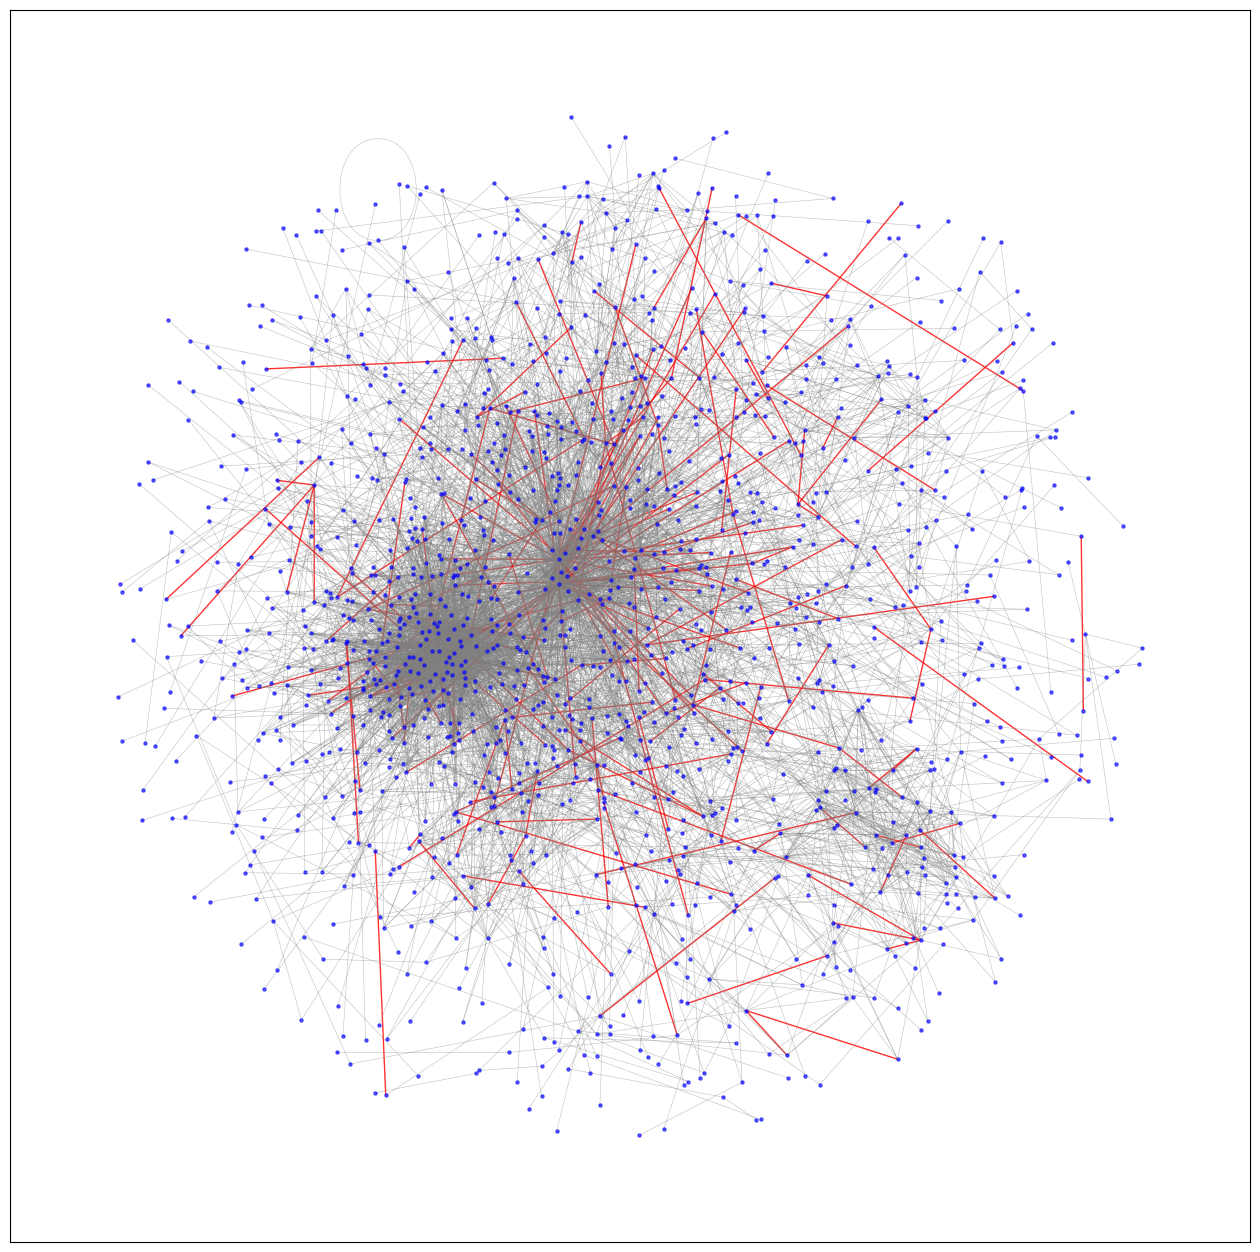

In [52]:
import matplotlib.pyplot as plt

largest_cc = max(nx.connected_components(G_filtered), key=len)
H = G_filtered.subgraph(largest_cc).copy()


pos = nx.spring_layout(H, seed=42, k=0.2)


red_edges = [(u, v) for u, v, d in H.edges(data=True) if d['most_important_references'] == 1]
default_edges = [(u, v) for u, v, d in H.edges(data=True) if d['most_important_references'] == 0]


plt.figure(figsize=(16, 16))

nx.draw_networkx_edges(H, pos, edgelist=red_edges, edge_color="red", alpha=0.8, width=1)
nx.draw_networkx_edges(H, pos, edgelist=default_edges, edge_color="gray", alpha=0.5, width=0.4)

nx.draw_networkx_nodes(H, pos, node_size=5, node_color="blue", alpha=0.6)

plt.show()

In [1]:
import torch
temp_tensor = torch.ones(3584)
indices = torch.randperm(temp_tensor.numel())[:temp_tensor.numel()//2]

random_values = torch.randn(temp_tensor.numel()//2)

temp_tensor.numel()[indices] = random_values

print(temp_tensor.numel())

TypeError: 'int' object does not support item assignment

In [9]:
import torch



# Create a tensor of shape [3584]
tensor = torch.zeros(3584)

# Get the total number of elements
num_elements = tensor.numel()

# Generate random indices for half the elements
num_to_change = int(num_elements*0.01)
indices = torch.randperm(num_elements)[:num_to_change]

# Generate random values for these indices
random_values = torch.randn(num_to_change)

# Replace the selected indices with the random values
tensor[indices] = random_values

print(tensor.sum())

tensor(-3.2667)


In [10]:
tensor

tensor([0., 0., 0.,  ..., 0., 0., 0.])